<a href="https://colab.research.google.com/github/meMatheshKannan/CodSoftTasks/blob/main/MOVIE_GENRE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
train_data_path="/content/train_data.txt"
train_data = pd.read_csv("/content/train_data.txt", header=None, sep=":::", names=["ID", "Title", "Genres","Description"], engine='python')
train_data.head()

,ID,Title,Genres,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6311 non-null   int64 
 1   Title        6311 non-null   object
 2   Genres       6311 non-null   object
 3   Description  6311 non-null   object
dtypes: int64(1), object(3)
memory usage: 197.3+ KB


In [ ]:
train_data.isnull().sum()

ID             0
Title          0
Genres         0
Description    0
dtype: int64

In [ ]:
test_path = "/content/train_data.txt"

test_data = pd.read_csv(test_path, sep=":::", names=["ID", "Title","Description"], engine="python")

test_data.head()

,ID,Title,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311 entries, 1 to 6311
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6311 non-null   object
 1   Title        6311 non-null   object
 2   Description  6311 non-null   object
dtypes: object(3)
memory usage: 197.2+ KB


In [ ]:
test_data.isnull().sum()

ID             0
Title          0
Description    0
dtype: int64

In [ ]:
def clean_description(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\s+", " ", text).strip()

    return text

In [ ]:
train_data['Clean_Description'] = train_data['Description'].apply(clean_description)
test_data['Clean_Description']=test_data['Description'].apply(clean_description)

<ipython-input-12-6cb8148efbb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y="Genres", order=train_data["Genres"].value_counts().index, palette=palette)
<ipython-input-12-6cb8148efbb3>:3: UserWarning: 
The palette list has fewer values (10) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=train_data, y="Genres", order=train_data["Genres"].value_counts().index, palette=palette)


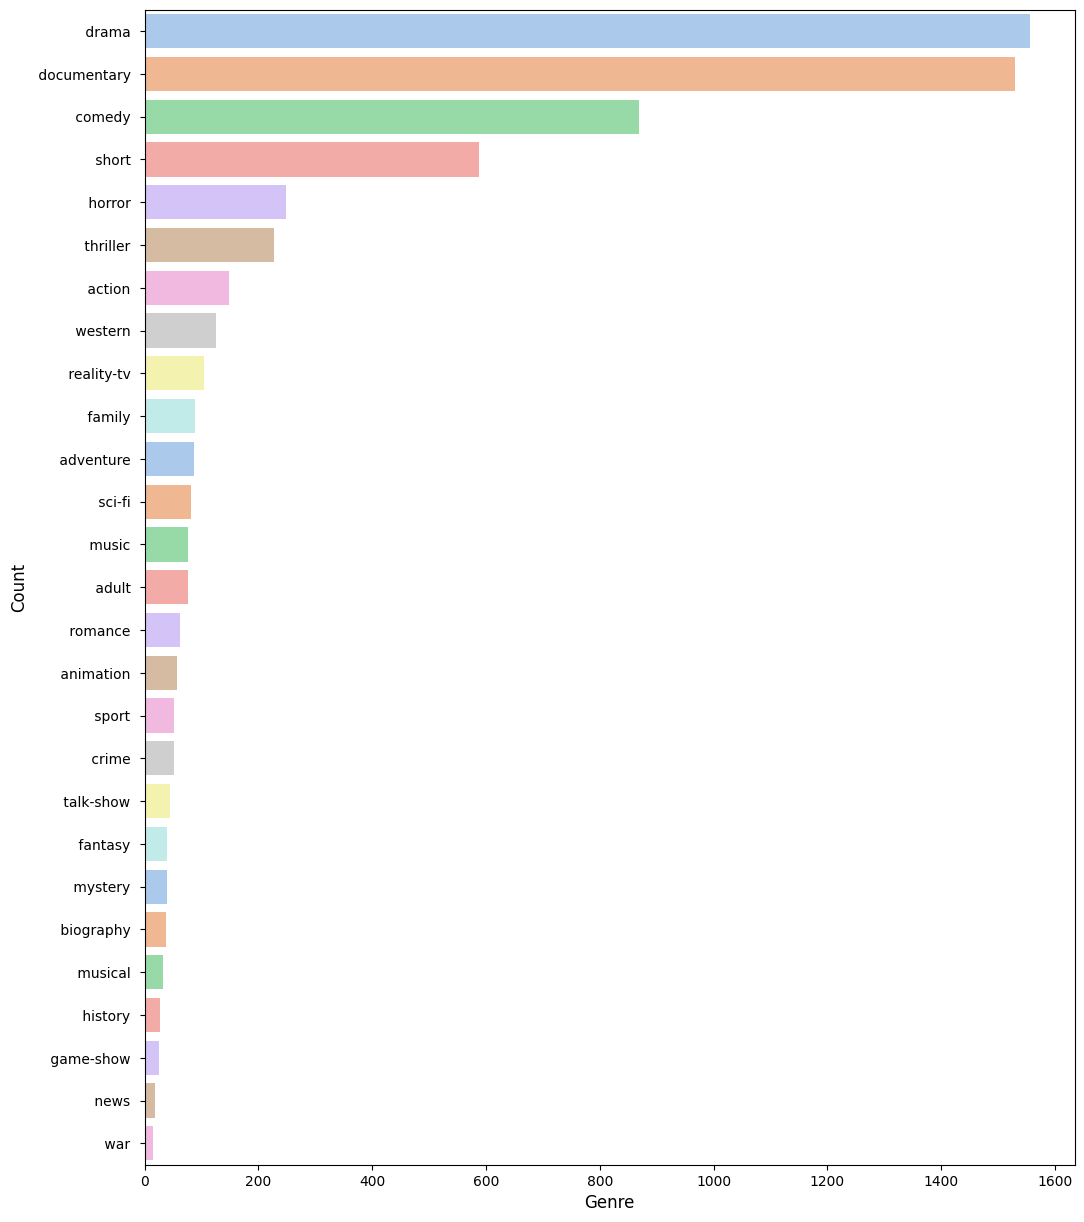

In [ ]:
palette = sns.color_palette("pastel")
plt.figure(figsize=(12, 15))
sns.countplot(data=train_data, y="Genres", order=train_data["Genres"].value_counts().index, palette=palette)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.show()

In [ ]:
X = train_data['Description']
y = train_data['Genres']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state=123)

In [ ]:
vectorize = TfidfVectorizer()
X_train_tfidf  = vectorize.fit_transform(X_train)
X_test_tfidf = vectorize.transform(test_data['Clean_Description'])
X_val_tfidf  = vectorize.transform(X_val)

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_val_tfidf, y_val)

SVC()

In [ ]:
y_pred_val = svm_classifier.predict(X_val_tfidf)
valAccuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", valAccuracy*100)

Validation Accuracy: 79.25574030087094
